# Analyzing Historical Stock/Revenue Data and Building a Dashboard

## Question 1: Use yfinance to Extract Stock Data


Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [1]:
import yfinance as yf
import pandas as pd

In [4]:
tesla = yf.Ticker('TSLA')

In [5]:
tesla_stock = tesla.history(period = 'max')

In [6]:
tesla_stock.reset_index(inplace=True)

In [7]:
tesla_stock.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


##  Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [60]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [61]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data=requests.get(url).text

In [62]:
soup = BeautifulSoup(data,"html5lib")

In [67]:
tesla_revenue= pd.read_html(url, match="Tesla Quarterly Revenue", flavor='bs4')[0]
tesla_revenue=tesla_revenue.rename(columns = {'Tesla Quarterly Revenue (Millions of US $)': 'Date', 'Tesla Quarterly Revenue (Millions of US $).1': 'Revenue (Mullions of US $)'})
tesla_revenue['Revenue (Mullions of US $)'] = tesla_revenue['Revenue (Mullions of US $)'].str.replace(",","").str.replace("$","")
tesla_revenue.tail()

,Date,Revenue (Mullions of US $)
49,2010-06-30,28
50,2010-03-31,21
51,2009-12-31,NaN
52,2009-09-30,46
53,2009-06-30,27


## Question 3 - Extracting GameStop Stock Data Using yfinanc

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [68]:
game_stop = yf.Ticker('GME')

In [69]:
game_stop_stocks = game_stop.history(period='max')

In [70]:
game_stop_stocks.reset_index(inplace =True)

In [71]:
game_stop_stocks.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693349,1.603295,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670627,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603295,1.662209,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [86]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [101]:
url= " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
data=requests.get(url).text

In [102]:
soup = BeautifulSoup(data,"html5lib")

In [103]:
game_stop_revenue =  pd.read_html(url, match="GameStop Quarterly Revenue", flavor='bs4')[0]
game_stop_revenue = game_stop_revenue.rename(columns = {'GameStop Quarterly Revenue (Millions of US $)': 'Date', 'GameStop Quarterly Revenue (Millions of US $).1': 'Revenue (Mullions of US $)'})
game_stop_revenue['Revenue (Mullions of US $)'] = game_stop_revenue['Revenue (Mullions of US $)'].str.replace(",","").str.replace("$","")
game_stop_revenue.tail()

,Date,Revenue (Mullions of US $)
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

Upload a screenshot of your result

In [107]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [114]:
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel('DATE')
    plt.ylabel('PRICE (USD)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()


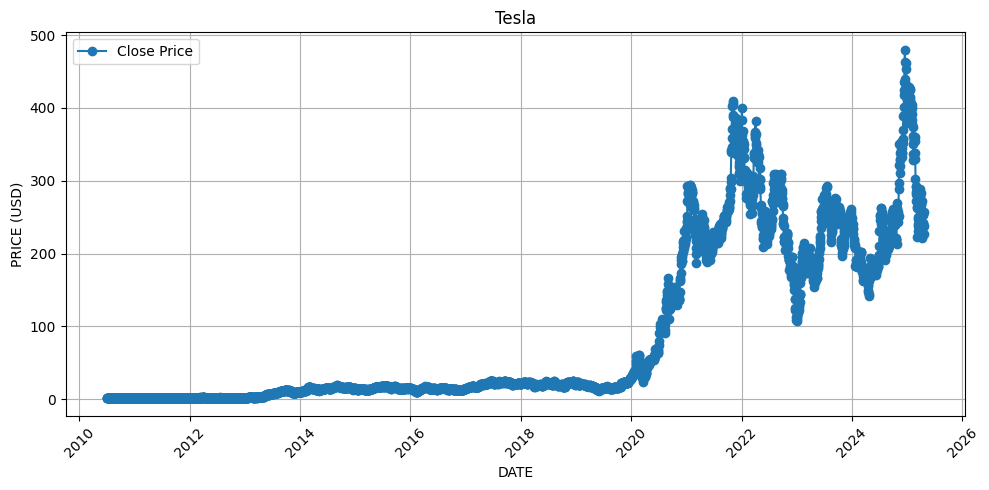

In [115]:
make_graph(tesla_stock, 'Tesla')

## Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

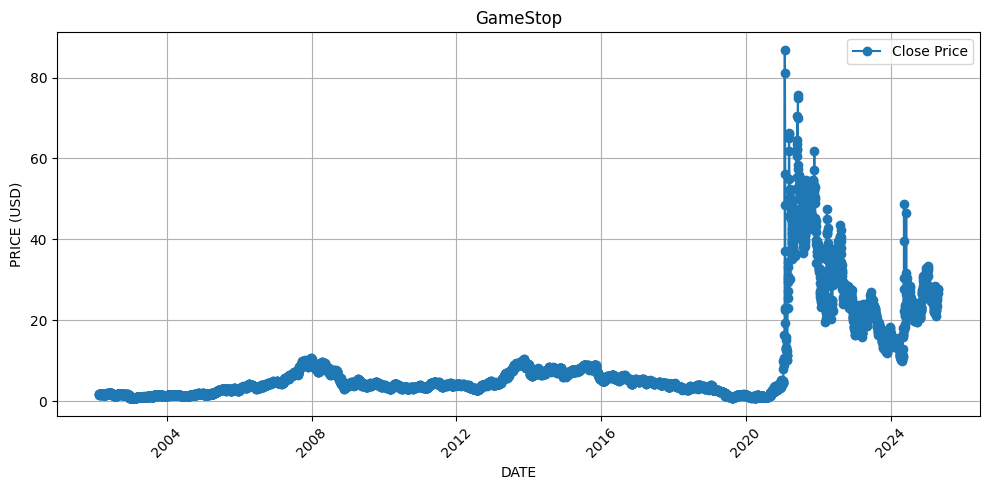

In [116]:
make_graph(game_stop_stocks, 'GameStop')